# I. Classification

(1797, 8, 8)
(1797, 64)


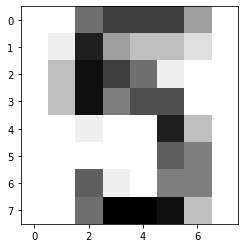

In [1]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display image 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

# 1. KNN - K Nearest Neighbors

In [2]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
import numpy as np

# Create feature and target arrays
feature = digits.data
target  = digits.target

# Split into training and test set
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size = 0.2, random_state=42, stratify=target)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(feature_train, target_train)

# Print the accuracy
print("Accuracy: {0}".format(knn.score(feature_test, target_test)))

Accuracy: 0.9833333333333333


# 1.1. KNN - Varying number of neighbors

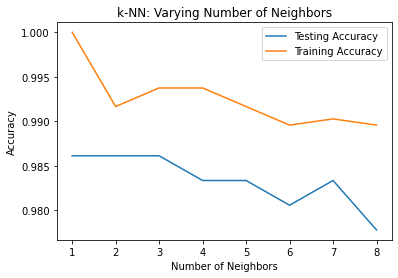

In [3]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(feature_train, target_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(feature_train, target_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(feature_test, target_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# Linear Regression

In [4]:
# Linear regression
from sklearn.linear_model import LinearRegression

# create linear regression classifier
lr = LinearRegression(normalize=True)

# Fit the classifier with training data
lr.fit(feature_train, target_train)

#print the accuracy
print("Accuracy: {0}".format(lr.score(feature_test, target_test)))

Accuracy: 0.5575481534037018


# 2. SVM

In [5]:
# Support vector machine
from sklearn.svm import SVC
from sklearn import metrics
# create SVM
svm = SVC(kernel='linear')

#Fit the training data
svm.fit(feature_train, target_train)
predicted = svm.predict(feature_test)
print("Classification report for classifier %s:\n%s\n"
      % (svm, metrics.classification_report(target_test, predicted)))


Classification report for classifier SVC(kernel='linear'):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.94      0.93        36
           2       1.00      1.00      1.00        35
           3       1.00      0.97      0.99        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.94      0.89      0.91        35
           9       0.95      1.00      0.97        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360




# 3. Naive Bayes

Accuracy: 0.8111111111111111


Text(0.5, 42.0, 'Predicted label')

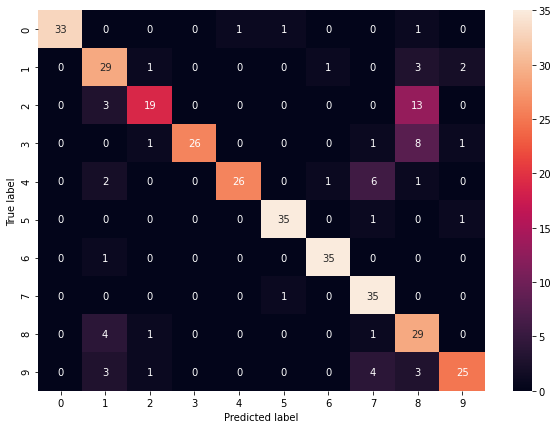

In [6]:
# Naive bayes 
from sklearn.naive_bayes import GaussianNB

# init the model
bayes = GaussianNB()

# Fit with the training data
bayes.fit(feature_train, target_train)
# print the result
print("Accuracy: {0}".format(bayes.score(feature_test, target_test)))

#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
predicted = bayes.predict(feature_test)
plt.figure(figsize=(10,7))
cm = confusion_matrix(target_test, predicted)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')



# 4. Model Evaluation

### 4.1 Quantitative Comparison

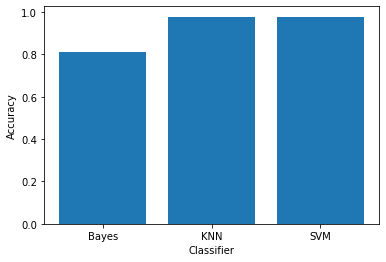

In [7]:
# Compare the accuracy of different classifiers in the same plot.
knn_acc = knn.score(feature_test, target_test)
lr_acc  = lr.score(feature_test, target_test)
svm_acc = svm.score(feature_test, target_test)
bayes_acc = bayes.score(feature_test, target_test)

x = ["Bayes", "KNN", "SVM"]
y = [bayes_acc, knn_acc, svm_acc]

plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.bar(x, y, align='center') 
plt.show()